In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
class EnzymeKinetics:
    def __init__(self, k1, k2, k3, k4, k5, S0, E0, A0, P0, I0, B0):
        self.k1 = k1
        self.k2 = k2
        self.k3 = k3
        self.k4 = k4
        self.k5 = k5
        
        self.S = [S0]
        self.E = [E0]
        self.A = [A0]
        self.P = [P0]
        self.I = [I0]
        self.B = [B0]
    
    def euler(self, dt):
        S = self.S[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1])
        E = self.E[-1] + dt*(-self.k1*self.S[-1]*self.E[-1] + self.k2*self.A[-1] + self.k3*self.A[-1])
        A = self.A[-1] + dt*(self.k1*self.S[-1]*self.E[-1] - self.k2*self.A[-1] -self.k3*self.A[-1])
        P = self.P[-1] + dt*(self.k3*self.A[-1])
        I = self.I[-1] + dt*(-self.k4*self.B[-1] + self.k5*self.B[-1])
        B = self.B[-1] + dt*(self.k4*self.B[-1] -self.k5*self.B[-1])
        self.S.append(S)
        self.E.append(E)
        self.A.append(A)
        self.P.append(P)
        self.I.append(I)
        self.B.append(B)
        return self.S, self.E, self.A, self.P, self.I, self.B

        

In [45]:
N = 2000 # number of intervalls.
tMax = 60.0 #seconds.
t = np.linspace(0,tMax,N)
dt = tMax/N

In [46]:
EK = EnzymeKinetics(1,1,1,1,1,1,1,1,1,1,1)

for i in range(N-1):
    EK.euler(dt)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


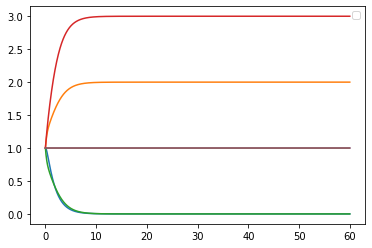

In [47]:
plt.plot(t, EK.S)
plt.plot(t, EK.E)
plt.plot(t, EK.A)
plt.plot(t, EK.P)
plt.plot(t, EK.I)
plt.plot(t, EK.B)
plt.legend()